<a href="https://colab.research.google.com/github/Sakshi-Dagadu-Mali/CodeClause-Internship-2023/blob/main/loan_predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Code Clause Internship**
## **Data Science - Loan Predicition**

In [120]:
from google.colab import drive

In [121]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing essential libraries

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [124]:
data = pd.read_csv('/content/drive/MyDrive/Data/Loan_Prediction.csv')

In [125]:
#printing first row of dataset
data.head

<bound method NDFrame.head of       Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0     

In [126]:
# Obtaining the dimensions of dataset
data.shape

(367, 13)

In [127]:
# Gives decription of the dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
# Statistical summary of dataset
data.info()

In [129]:
# Check null values
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

In [130]:
                   # Dealing with Categorical values
    
# Gender Column
data['Gender'] =  data['Gender'].map({'Male':0,'Female':1})

# Married column
data['Married'] = data['Married'].map({'No':0,'Yes':1})

# Loan_Status column
data['Loan_Status'] = data['Loan_Status'].map({'N':0,'Y':1})

In [131]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,0.0,1,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,0.0,1,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,0.0,1,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,0.0,1,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,0.0,0,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0.0,1,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,1
363,LP002975,0.0,1,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,0
364,LP002980,0.0,0,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,0
365,LP002986,0.0,1,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,0


In [132]:
# Gender column 
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [134]:
# Married column
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [135]:
# Dependents Column
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [136]:
# Self_Employed Column
data['Self_Employed'].fillna('No',inplace=True)

In [137]:
# Credit_History Column
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [138]:
# LoanAmount Column
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

In [139]:
# Loan_Amount Column
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [140]:
# Counting the accurance of each value in Gender column
data['Gender'].value_counts()

0.0    297
1.0     70
Name: Gender, dtype: int64

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

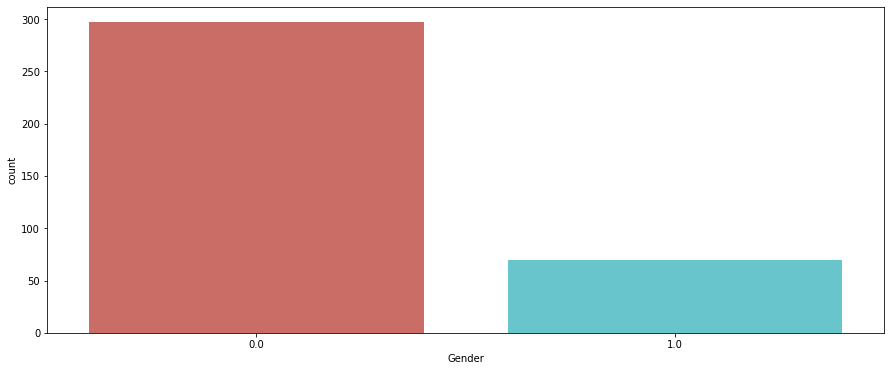

In [142]:
plt.figure(figsize=(15,6))
sns.countplot('Gender', data= data, palette = 'hls' )
plt.show()

In [143]:
# Counting the accurance of each value in Dependent column
data['Dependents'].value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

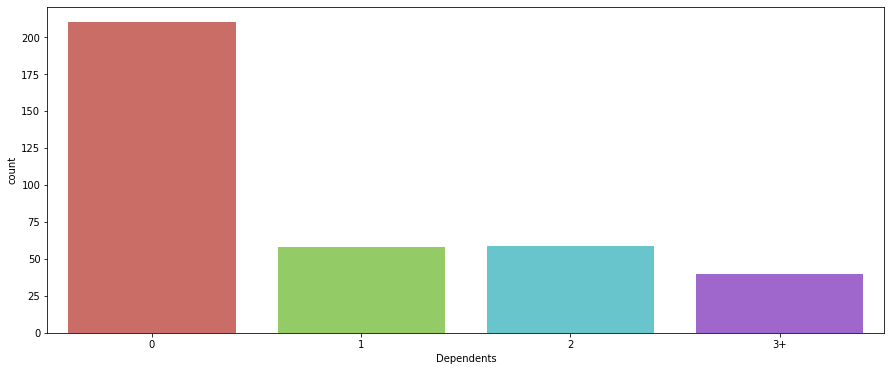

In [144]:
plt.figure(figsize=(15,6))
sns.countplot('Dependents', data = data, palette='hls')
plt.show()

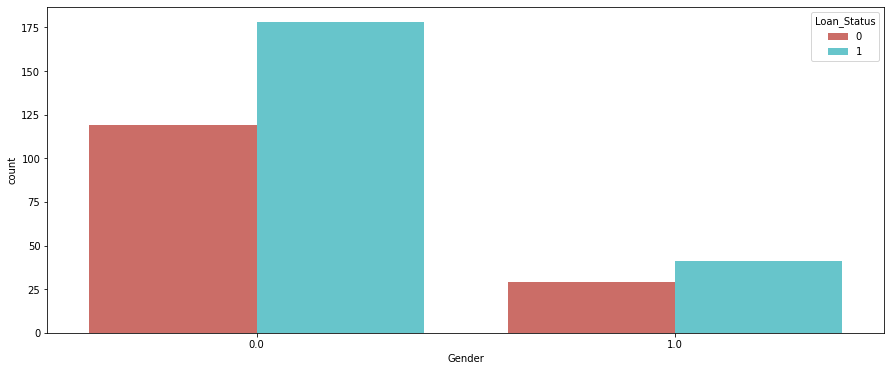

In [145]:
# comparing loan status with gender column
plt.figure(figsize=(15,6))
sns.countplot(x = 'Gender',hue ='Loan_Status', data=data , palette='hls')
plt.show()

<AxesSubplot:xlabel='Married', ylabel='count'>

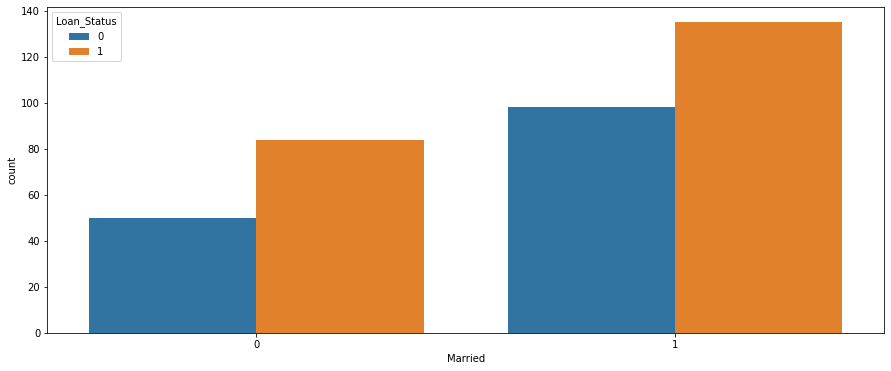

In [146]:
# comparing loan status with married column
plt.figure(figsize = (15,6))
sns.countplot( x='Married', hue ='Loan_Status', data = data)

In [147]:
#Counting the occurence of each value with Loan_amount_term column
data['Loan_Amount_Term'].value_counts()

360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

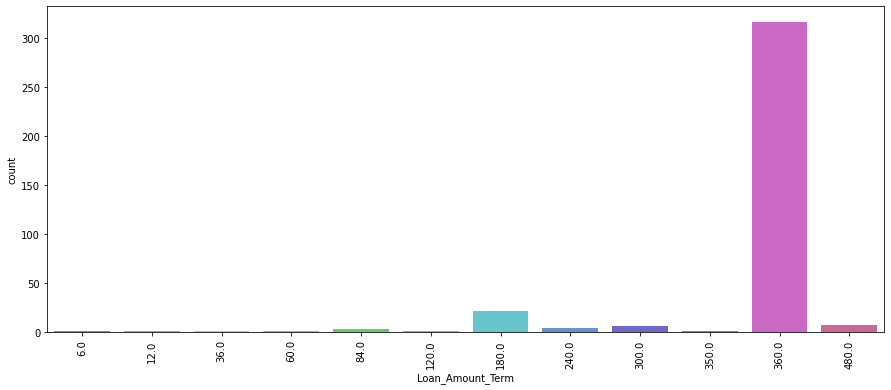

In [148]:
plt.figure(figsize=(15,6))
sns.countplot('Loan_Amount_Term', data = data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

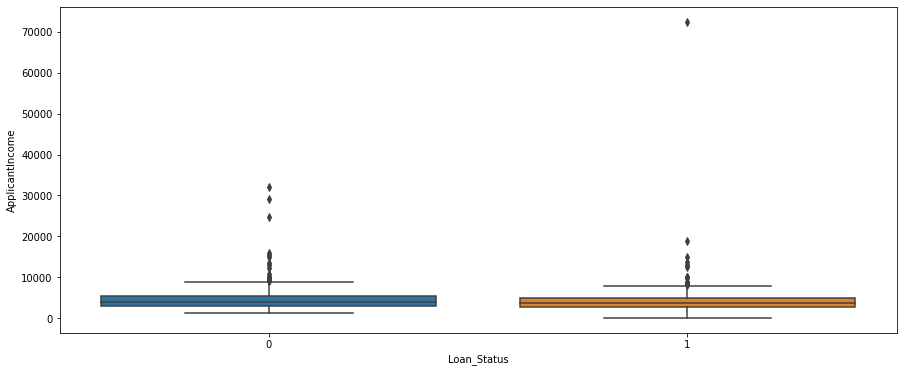

In [149]:
# plotting boxplot
plt.figure(figsize=(15,6))
sns.boxplot(x='Loan_Status',y = 'ApplicantIncome', data=data)
plt.show()

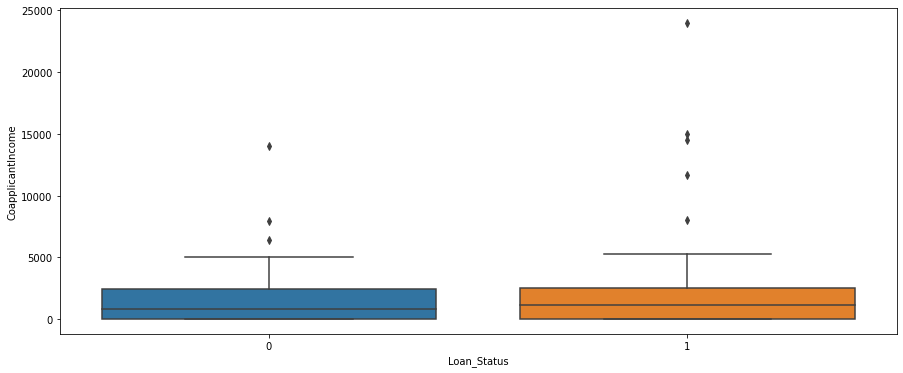

In [150]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Loan_Status',y = 'CoapplicantIncome', data= data)
plt.show()

<AxesSubplot:>

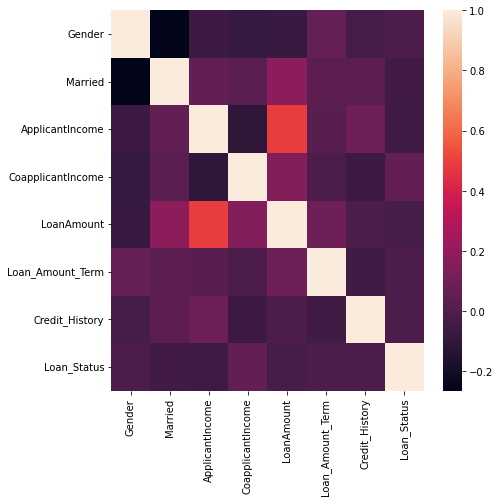

In [151]:
# Showing correlation through heatmap
plt.figure(figsize=(7,7))
sns.heatmap(data.corr())

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

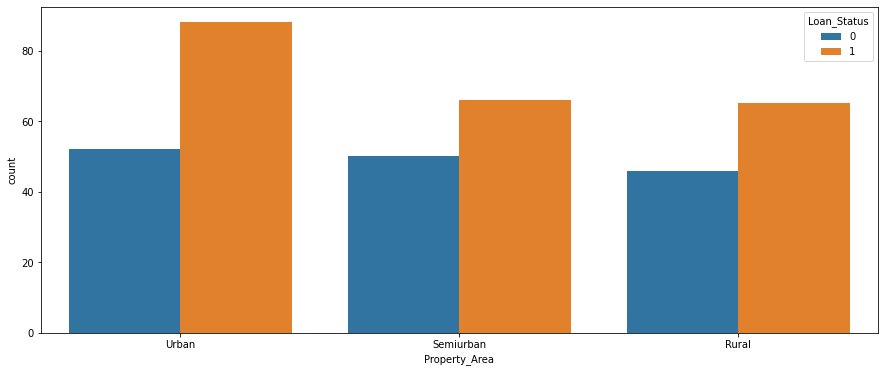

In [152]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Property_Area', hue='Loan_Status', data = data)

Urban obtain more loan, folowed by semiurban and then rural.



<AxesSubplot:xlabel='Credit_History', ylabel='count'>

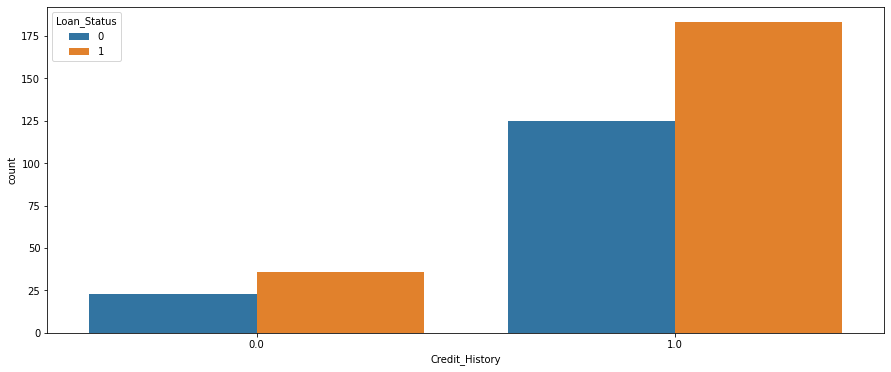

In [153]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Credit_History', hue='Loan_Status', data = data)

According to the credit history, greater number of people pay back their loans.



<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

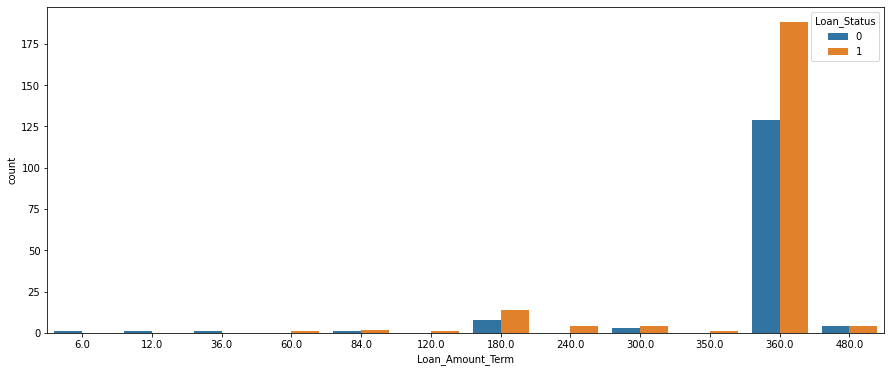

In [154]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Loan_Amount_Term', hue='Loan_Status', data = data)


An extremely high number of them go for a 360 cyclic loan term. That’s pay back within a year


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

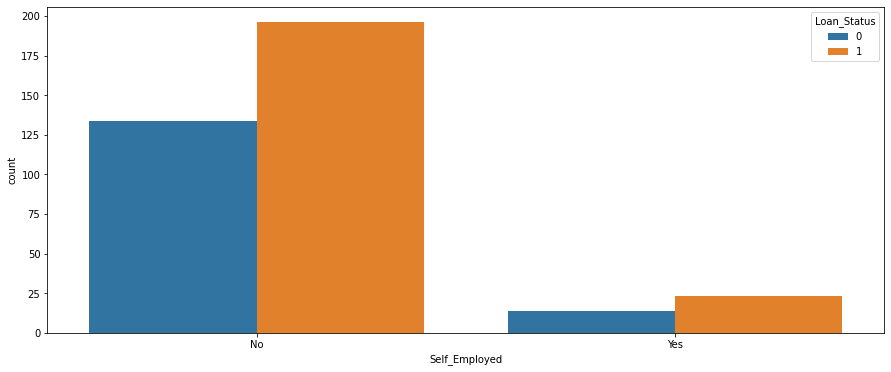

In [155]:
plt.figure(figsize=(15,6))
sns.countplot( x = 'Self_Employed', hue = 'Loan_Status', data = data)

The category of those that take loans is less of self-employed people. That those who are not self-employed probably salary earners obtain more loan.



**Model Building and Prediction**

In [156]:
X = data[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount',
'Credit_History']]
y = data.Loan_Status

In [157]:
# Data Splitting
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.2,
random_state = 10)

**Random forest algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4, random_state = 10)
model.fit(x_train, y_train)

In [159]:
from sklearn.metrics import accuracy_score
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.5135135135135135

In [160]:
pred_train = model.predict(x_train)
print("Accuracy: ",accuracy_score(y_train,pred_train))

Accuracy:  0.7030716723549488


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

In [162]:
from sklearn.metrics import accuracy_score
y_pred= model.predict(x_train) 
print("Accuracy: ",accuracy_score(y_pred,y_train))

Accuracy:  0.6143344709897611


**Linear svm**

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
model.fit(x_train, y_train)

In [167]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_train)
print("Accuracy: ",accuracy_score(y_pred,y_train))

Accuracy:  0.6143344709897611
